## Loan Default binary classification

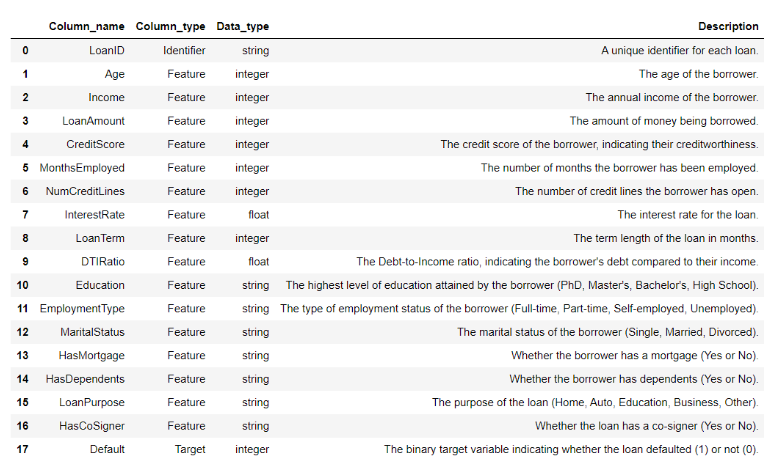

## Exploratory Data Analysis

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load the csv file
csv_file = 'loan_default.csv'
df = pd.read_csv(csv_file)

In [4]:
df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [5]:
df.tail()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
255342,8C6S86ESGC,19,37979,210682,541,109,4,14.11,12,0.85,Bachelor's,Full-time,Married,No,No,Other,No,0
255343,98R4KDHNND,32,51953,189899,511,14,2,11.55,24,0.21,High School,Part-time,Divorced,No,No,Home,No,1
255344,XQK1UUUNGP,56,84820,208294,597,70,3,5.29,60,0.50,High School,Self-employed,Married,Yes,Yes,Auto,Yes,0
255345,JAO28CPL4H,42,85109,60575,809,40,1,20.90,48,0.44,High School,Part-time,Single,Yes,Yes,Other,No,0
255346,ZTH91CGL0B,62,22418,18481,636,113,2,6.73,12,0.48,Bachelor's,Unemployed,Divorced,Yes,No,Education,Yes,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [7]:
# Check for null values
df.isna().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [8]:
# Check for duplicates on LoanID
id_duplicate = df['LoanID'].duplicated().sum()
print(f'There are {id_duplicate} dupicate LoanID in the dataset')

# Set LoanID to index
df.set_index('LoanID', inplace = True)

There are 0 dupicate LoanID in the dataset


In [9]:
df.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
LoanID,,,,,,,,,,,,,,,,,
I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [10]:
df.describe().round(2)

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.00,255347.00,255347.00,255347.00,255347.00,255347.00,255347.00,255347.00,255347.00,255347.00
mean,43.50,82499.30,127578.87,574.26,59.54,2.50,13.49,36.03,0.50,0.12
std,14.99,38963.01,70840.71,158.90,34.64,1.12,6.64,16.97,0.23,0.32
min,18.00,15000.00,5000.00,300.00,0.00,1.00,2.00,12.00,0.10,0.00
25%,31.00,48825.50,66156.00,437.00,30.00,2.00,7.77,24.00,0.30,0.00
50%,43.00,82466.00,127556.00,574.00,60.00,2.00,13.46,36.00,0.50,0.00
75%,56.00,116219.00,188985.00,712.00,90.00,3.00,19.25,48.00,0.70,0.00
max,69.00,149999.00,249999.00,849.00,119.00,4.00,25.00,60.00,0.90,1.00


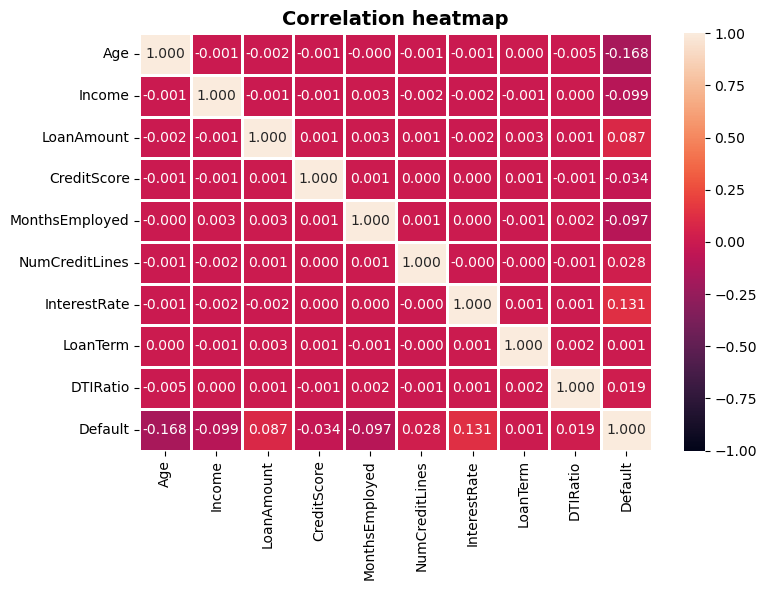

In [11]:
# Correlation matrix - numeric features only
corr = df.corr(numeric_only = True)

plt.figure(figsize = (8, 6))
sns.heatmap(
    data = corr,
    annot = True,
    vmin = -1,
    vmax = 1,
    linewidth = 2,
    fmt ='.3f',
)
plt.title('Correlation heatmap', fontsize = 14, fontweight = 'bold')
plt.savefig('corr.jpeg', bbox_inches = 'tight')
plt.tight_layout()
plt.show()

In [12]:
# Profile the Income, debt to income ratios and CreditScore
print(df['Income'].describe().round(2))
print()
print(df['CreditScore'].describe().round(2))

count    255347.00
mean      82499.30
std       38963.01
min       15000.00
25%       48825.50
50%       82466.00
75%      116219.00
max      149999.00
Name: Income, dtype: float64

count    255347.00
mean        574.26
std         158.90
min         300.00
25%         437.00
50%         574.00
75%         712.00
max         849.00
Name: CreditScore, dtype: float64


## Create new two new features

In [13]:
# Create new categorical features for Income and CreditScoreh
# Income level function
def income_level(row):
    if row['Income'] <= 15000:
        val = 'Low Income'
    elif row['Income'] >= 15001 and row['Income'] <= 50000:
        val = 'Below Average Income'
    elif row['Income'] >= 50001 and row['Income'] <= 85000:
        val = 'Middle Income'
    elif row['Income'] >= 85001 and row['Income'] <= 100000:
        val = 'High Income'
    else:
        val = 'Very High Income'
    return val

# Credit level function
def credit_level(row):
    if row['CreditScore'] <= 299:
        val = 'Low'
    elif row['CreditScore'] >= 300 and row['CreditScore'] <= 499:
        val = 'Fair'
    elif row['CreditScore'] >= 500 and row['CreditScore'] <= 699:
        val = 'Average'
    elif row['CreditScore'] >= 700 and row['CreditScore'] <= 799:
        val = 'Very Good'
    else:
        val = 'Excellent'
    return val

In [14]:
# Apply income level and credit level feature to dataset
df['IncomeLevel'] = df.apply(income_level, axis = 1)
print(df['IncomeLevel'].value_counts())
print()

df['CreditScoreLevel'] = df.apply(credit_level, axis = 1)
print(df['CreditScoreLevel'].value_counts())

IncomeLevel
Very High Income        94565
Middle Income           66422
Below Average Income    66096
High Income             28261
Low Income                  3
Name: count, dtype: int64

CreditScoreLevel
Fair         93029
Average      92888
Very Good    45962
Excellent    23468
Name: count, dtype: int64


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 255347 entries, I38PQUQS96 to ZTH91CGL0B
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Age               255347 non-null  int64  
 1   Income            255347 non-null  int64  
 2   LoanAmount        255347 non-null  int64  
 3   CreditScore       255347 non-null  int64  
 4   MonthsEmployed    255347 non-null  int64  
 5   NumCreditLines    255347 non-null  int64  
 6   InterestRate      255347 non-null  float64
 7   LoanTerm          255347 non-null  int64  
 8   DTIRatio          255347 non-null  float64
 9   Education         255347 non-null  object 
 10  EmploymentType    255347 non-null  object 
 11  MaritalStatus     255347 non-null  object 
 12  HasMortgage       255347 non-null  object 
 13  HasDependents     255347 non-null  object 
 14  LoanPurpose       255347 non-null  object 
 15  HasCoSigner       255347 non-null  object 
 16  Default     

## Visuals

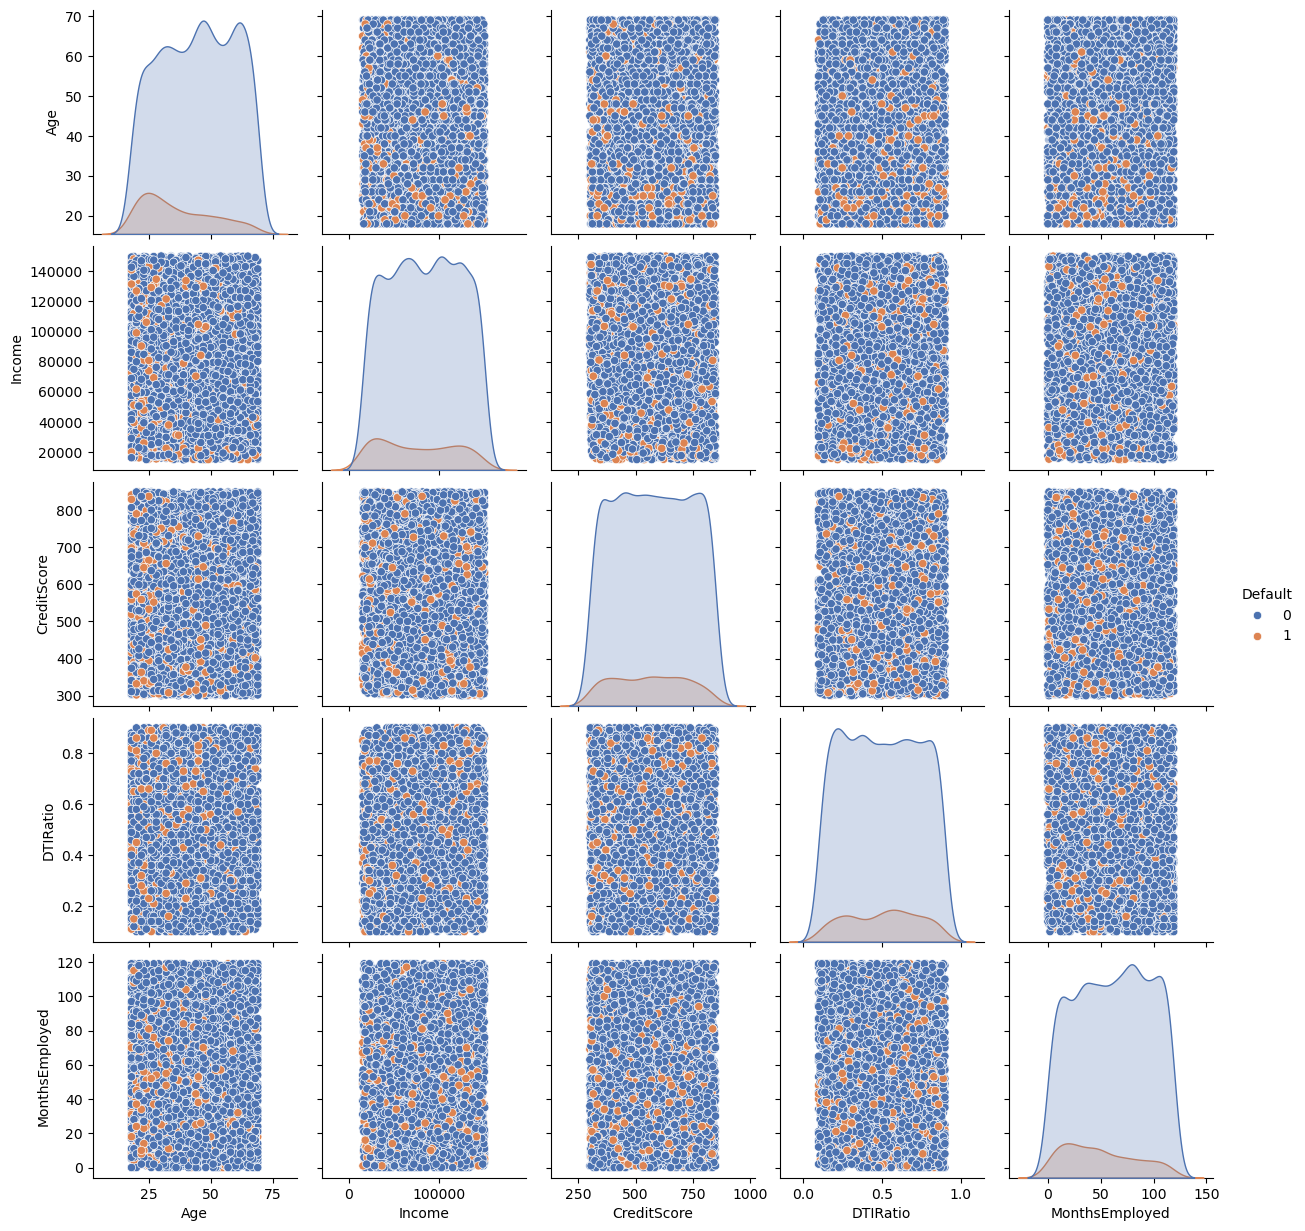

In [16]:
# Pairplot
vars_list = ['Age', 'Income', 'CreditScore', 'DTIRatio', 'MonthsEmployed']

sns.pairplot(
    data = df.sample(5000),
    hue = 'Default',
    palette = 'deep',
    kind = 'scatter',
    vars = vars_list
)

plt.savefig('pairplot.jpeg', bbox_inches = 'tight')
plt.show()

In [17]:
# Countplot function
def count(figsize, data, x, title):
    sns.set_style('darkgrid')
    plt.figure(figsize = (figsize))
    sns.countplot(
        data,
        x = x,
        palette = 'deep',
        stat = 'percent',
        edgecolor = 'black'
    )
    plt.title(title, fontsize = 14, fontweight = 'bold')
    plt.savefig(f'{title}.jpeg', bbox_inches = 'tight')
    plt.show()

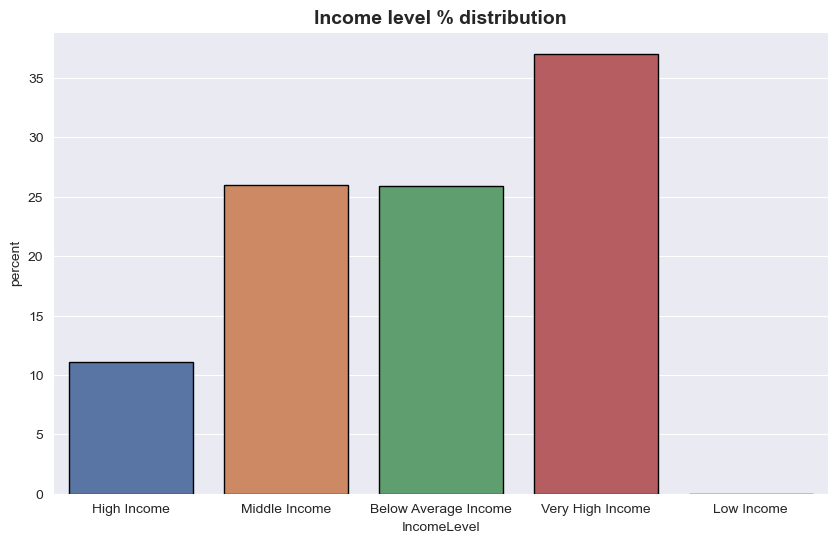

In [18]:
# Percentage of income levels
count((10, 6), df, 'IncomeLevel', 'Income level % distribution')

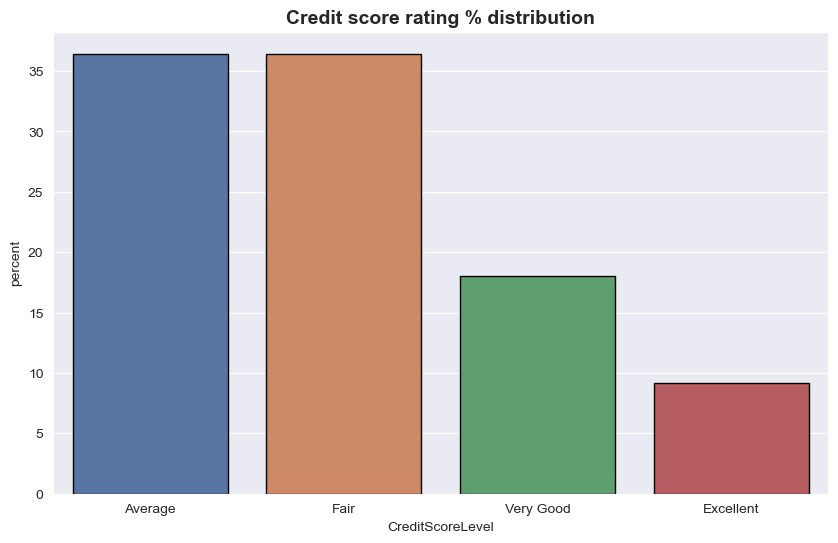

In [19]:
# Percentage of credit score levels
count((10,6), df, 'CreditScoreLevel', 'Credit score rating % distribution')

In [20]:
# Target variable value counts
df['Default'].value_counts()

Default
0    225694
1     29653
Name: count, dtype: int64

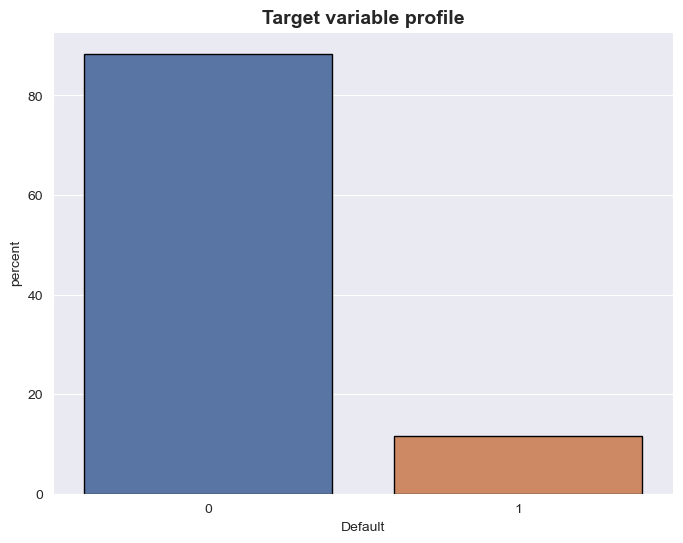

In [21]:
# Profile target variable
count((8, 6), df, 'Default', 'Target variable profile')

In [22]:
# Groupby functions
def total(col):
    result = df.groupby('Default')[col].sum().apply(lambda x: f'{x:,.0f}')
    return result

def average(col):
    result = df.groupby('Default')[col].mean().apply(lambda x: f'{x:,.0f}')
    return result

In [23]:
# Explore target variable
loan_sum = total('LoanAmount')
loan_avg = average('LoanAmount')
age_avg = average('Age')
inc_avg = average('Income')
score_avg = average('CreditScore')

# Create dataframe of target variable
df_target = pd.DataFrame({
    'Total loan amount': loan_sum,
    'Average loan amount': loan_avg,
    'Average age': age_avg,
    'Average income': inc_avg,
    'Average credit score': score_avg
})

df_target

,Total loan amount,Average loan amount,Average age,Average income,Average credit score
Default,,,,,
0,"28,291,568,041","125,354",44,"83,899",576
1,"4,285,312,531","144,515",37,"71,845",559


In [34]:
# View employment type and marital status
print(df.groupby('Default')['EmploymentType'].value_counts())
print()
print(df.groupby('Default')['MaritalStatus'].value_counts())

Default  EmploymentType
0        Full-time         57632
         Part-time         56484
         Self-employed     56404
         Unemployed        55174
1        Unemployed         8650
         Part-time          7677
         Self-employed      7302
         Full-time          6024
Name: count, dtype: int64

Default  MaritalStatus
0        Married          76433
         Single           74885
         Divorced         74376
1        Divorced         10657
         Single           10127
         Married           8869
Name: count, dtype: int64


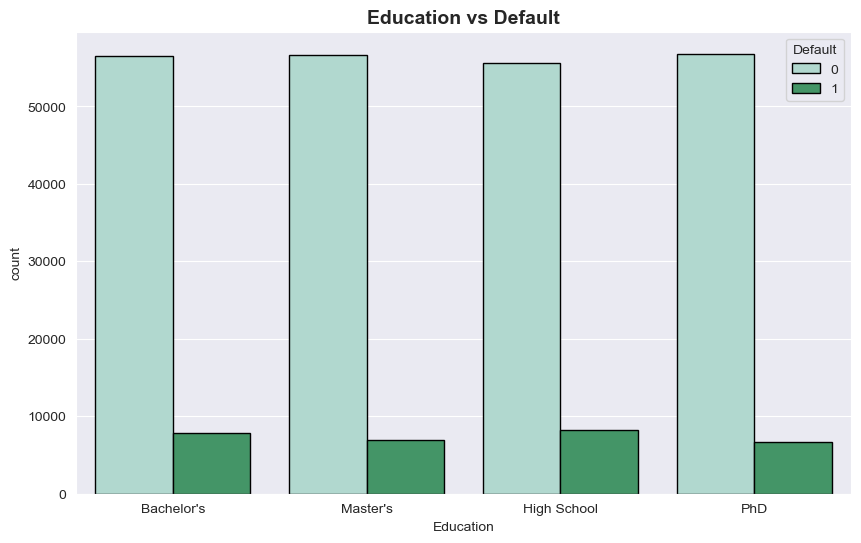

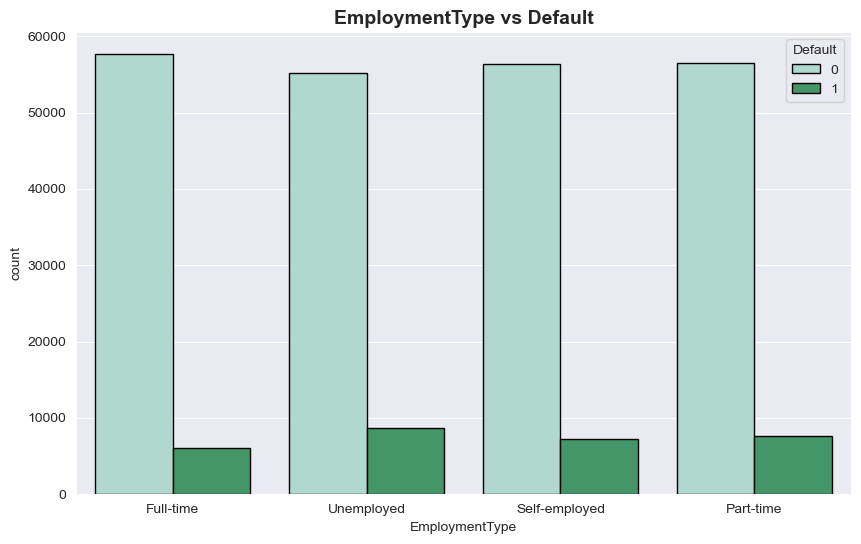

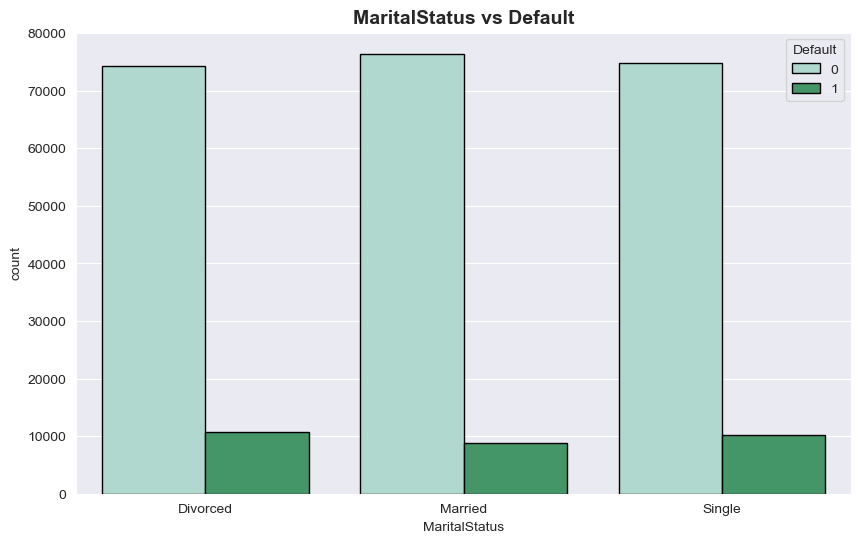

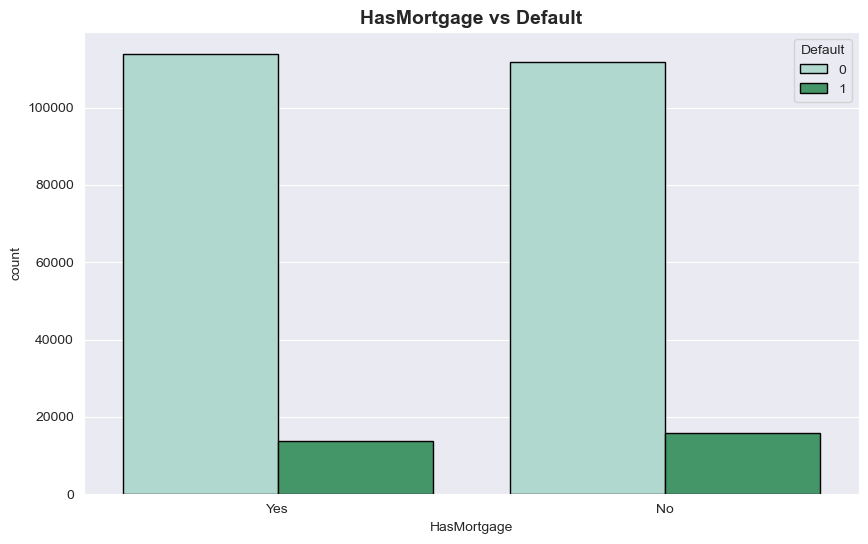

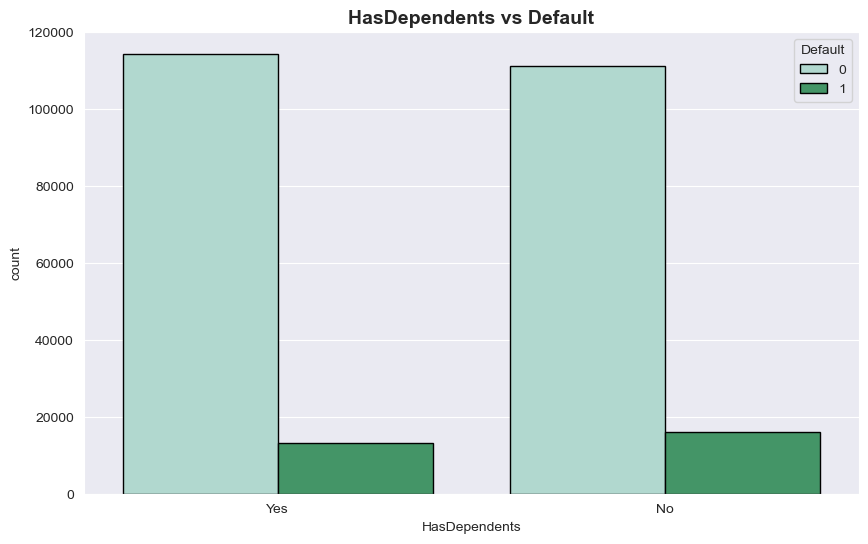

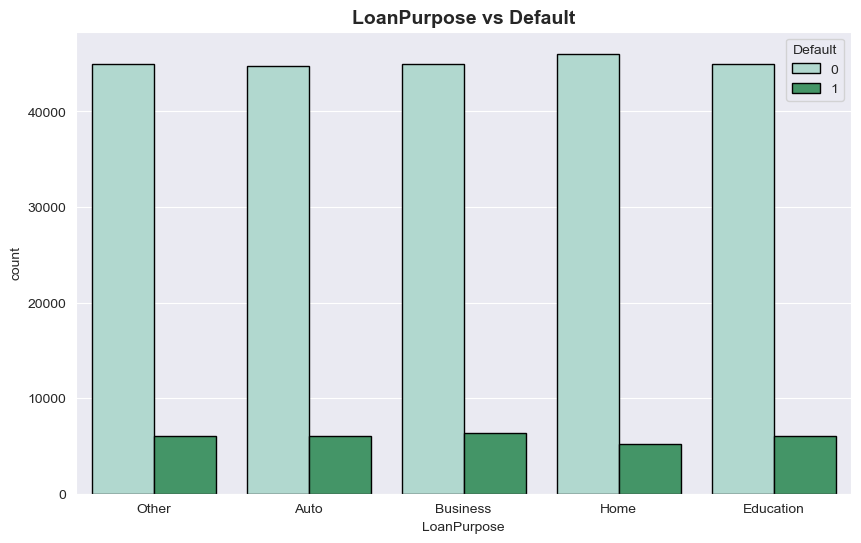

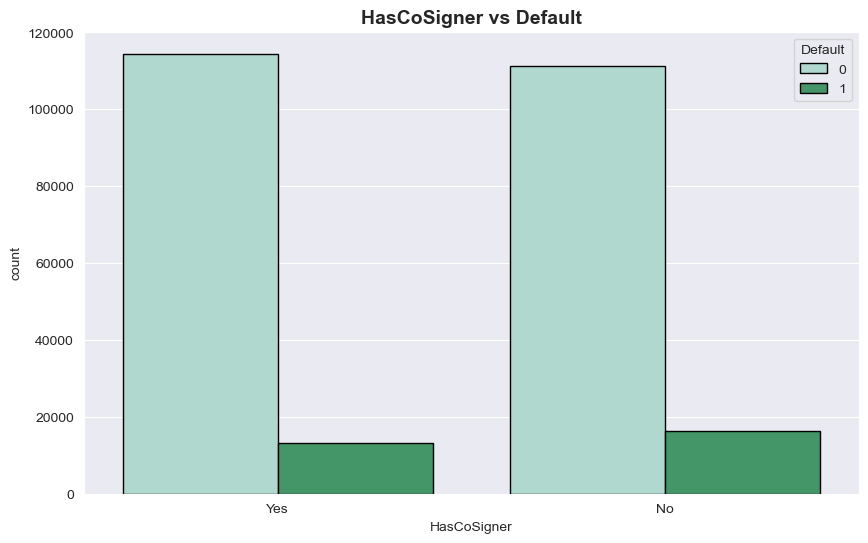

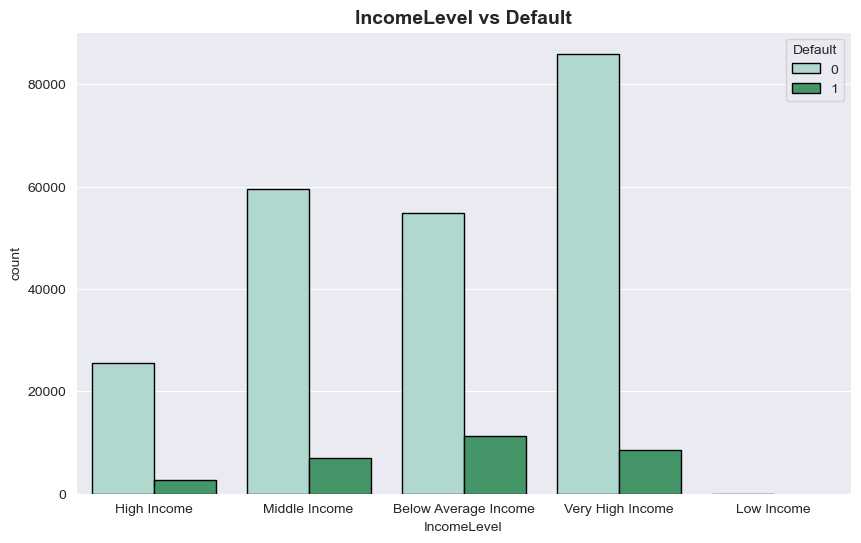

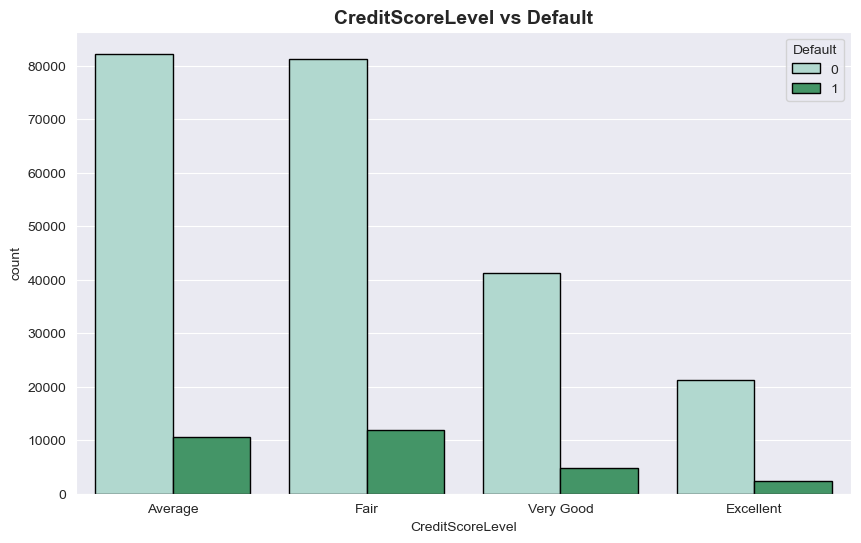

In [24]:
# Profile all object columns against target variable
var_object = df.select_dtypes(include = 'object')

for var in var_object:
    plt.figure(figsize = (10, 6))
    sns.countplot(
        data = df,
        x = var,
        hue = 'Default',
        edgecolor = 'black',
        palette = 'BuGn'
    )
    plt.title(f'{var} vs Default', fontsize = 14, fontweight = 'bold')
    plt.savefig(f'{var}.jpeg', bbox_inches = 'tight')
    plt.show()

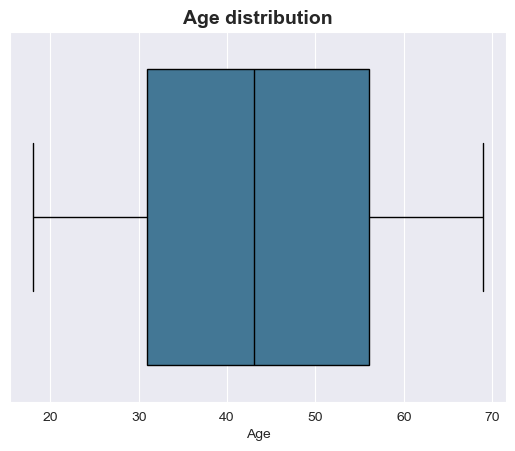

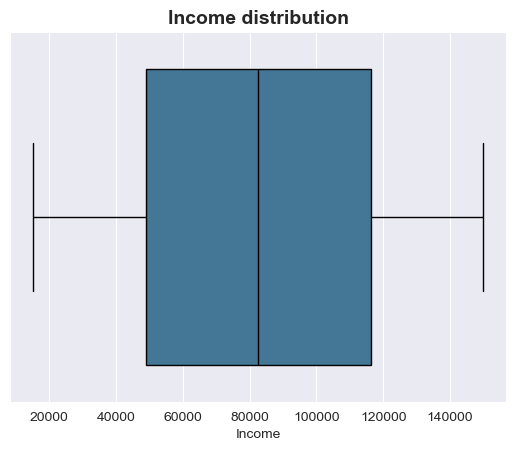

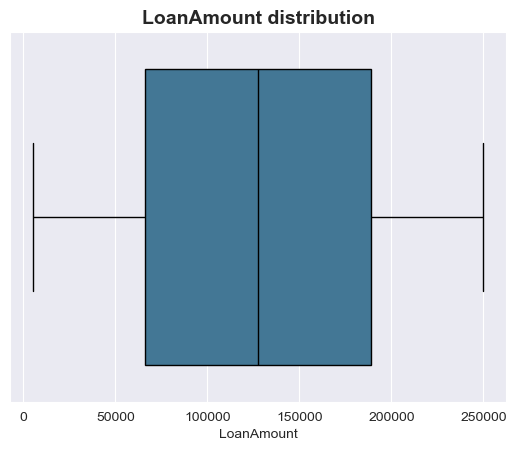

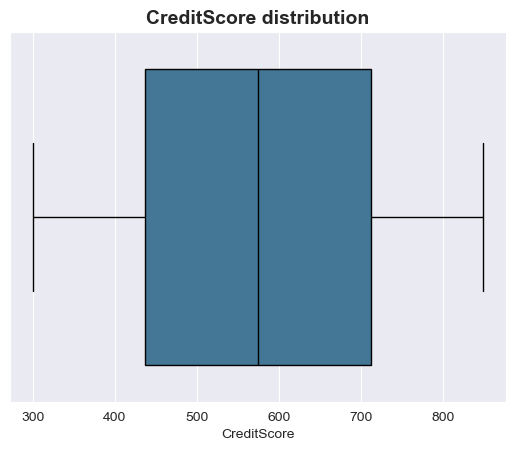

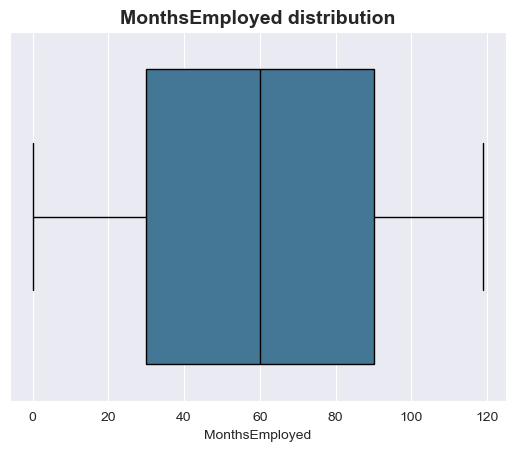

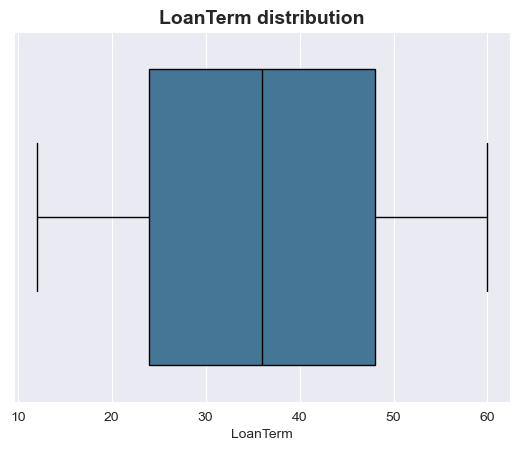

In [25]:
# Profile all int features - Check for outliers
var_int = df.select_dtypes(include = 'int').drop(['Default', 'NumCreditLines'], axis = 1)

for var in var_int:
    sns.set_style('darkgrid')
    sns.boxplot(
        data = df,
        x = var,
        palette = 'mako',
        linecolor = 'black'
    )
    plt.title(f'{var} distribution', fontsize = 14, fontweight = 'bold')
    plt.savefig(f'{var}.jpeg', bbox_inches = 'tight')
    plt.show()

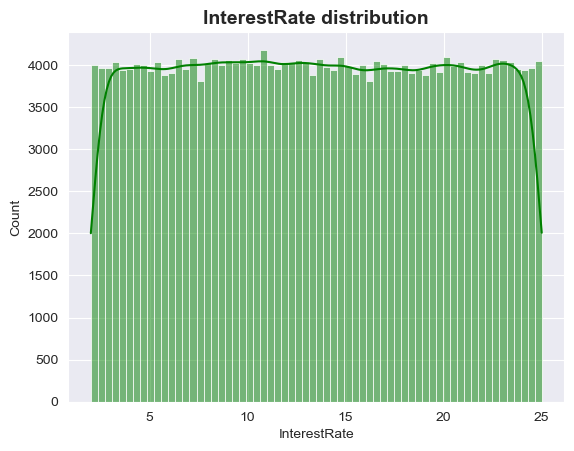

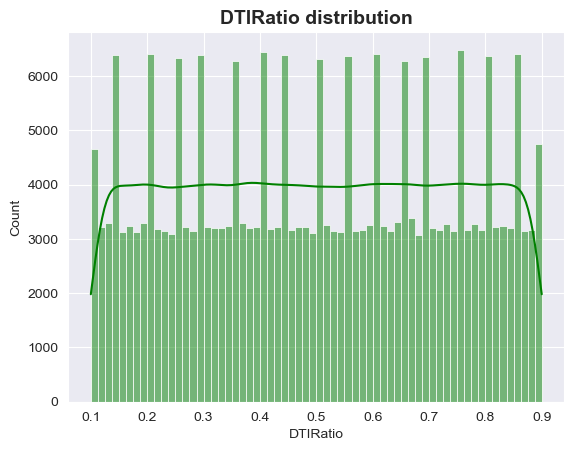

In [26]:
# Profile all float features
var_float = df.select_dtypes(include = 'float')

for var in var_float:
    sns.set_style('darkgrid')
    sns.histplot(
        data = df,
        x = var,
        kde = True,
        color = 'green'
    )
    plt.title(f'{var} distribution', fontsize = 14, fontweight = 'bold')
    plt.savefig(f'{var}.jpeg', bbox_inches = 'tight')
    plt.show()